# Distribution of objecive function values for the 'poor' performing ($c_1, c_2$) settings.

Purpose:
* Show that the CDF's of objective function values for 'poor' performing ($c_1, c_2$) settings collapses reasonably well to the CDF of a normal diistribution. 

In [1]:
fig_save_path = r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 7"

In [2]:
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np 
from matplotlib.colors import LogNorm

import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
cmap = cmaps.inferno

In [4]:
def subaxes_inset(position = [2.03*1e-1, 0.738, 3.0*1e-1, 0.20]):
    subaxes = plt.axes(position, frameon=False)
    subaxes.imshow(grid, cmap = cmap, interpolation='None')

    subaxes.xaxis.set_ticks([0,1,2,3]) 
    subaxes.yaxis.set_ticks([0,1,2,3]) 
    subaxes.xaxis.set_tick_params(size = 1, width = 0.25,  pad=1)
    subaxes.yaxis.set_tick_params(size = 1, width = 0.25, pad = 1)

    subaxes.yaxis.set_label_position("right")
    subaxes.yaxis.tick_right()

    subaxes.set_xticklabels(np.arange(2.75, 3.75, 0.25), size = 3.5)
    subaxes.set_yticklabels(["%.2f" % x for x in np.arange(2.75, 3.75, 0.25)[::-1]], size = 3.5)

    subaxes.set_xlabel(r'$c_1$', fontsize = 5, labelpad = 1)
    subaxes.set_ylabel(r'$c_2$', fontsize = 5, labelpad = 1)

    subaxes.axvline(0.5, 0, 3, linewidth = 0.50, color = 'white')
    subaxes.axhline(0.5, 0, 3, linewidth = 0.50, color = 'white')
    subaxes.axvline(1.5, 0, 3, linewidth = 0.50, color = 'white')
    subaxes.axhline(1.5, 0, 3, linewidth = 0.50, color = 'white')
    subaxes.axvline(2.5, 0, 3, linewidth = 0.50, color = 'white')
    subaxes.axhline(2.5, 0, 3, linewidth = 0.50, color = 'white')

    subaxes.yaxis.tick_right()

In [5]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

### Common Data

In [6]:
data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - 0.25\Data\best_cost_grid.npy")

In [7]:
grid = np.ones((4,4))

count = 1
for i in range(4):
    for j in range(4):
        grid[i,j] = float(1*(count/16)) 
        count += 1

        
grid = np.flipud(grid)

## [1] Raw Distribution

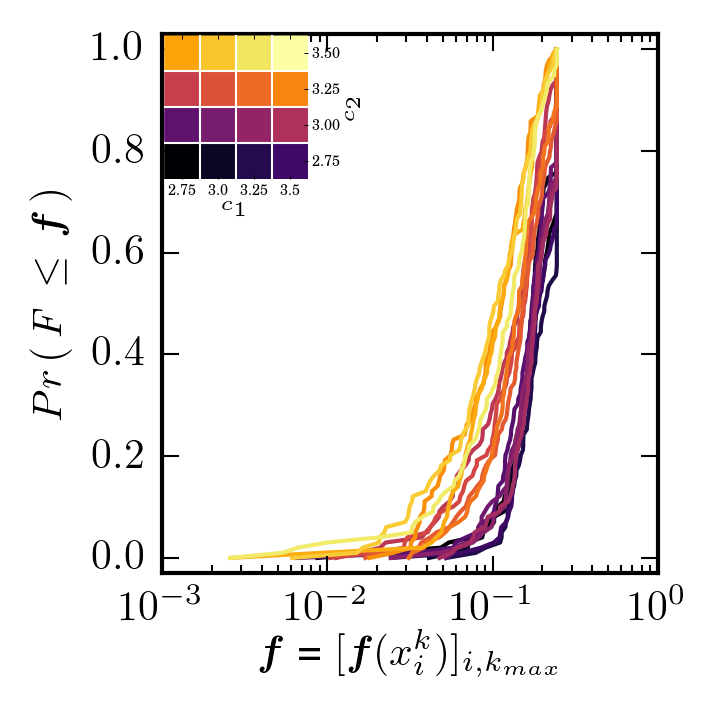

In [27]:
halffig()

c1c2pairs = [
                [11,14], [12,14], [13,14], [14,14],
                [11,13], [12,13], [13,13], [14,13],
                [11,12], [12,12], [13,12], [14,12],
                [11,11], [12,11], [13,11], [14,11]
            ]

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])     
        plt.semilogx(data_sorted , np.linspace(0,1,data_sorted.size), linewidth = 1,\
                    label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100)), \
                    color=cmap(float(1*(i/16))))
        
           
plt.xlabel(r'$\boldsymbol{f}$ = $[\boldsymbol{f}(x_i^k)]_{i,k_{max}}$', labelpad = 2) 
plt.ylabel(r'$Pr\,(\,\it{F\,\leq\,\boldsymbol{f}}\,)$', labelpad = 5)
plt.ylim([-0.03, 1.03])

subaxes_inset()

plt.savefig(fig_save_path + "\distribution_divergent_search.pdf", format='pdf',
            bbox_inches='tight')

plt.show()        


## [2] Distribution Collapsed to a Normal Distribution

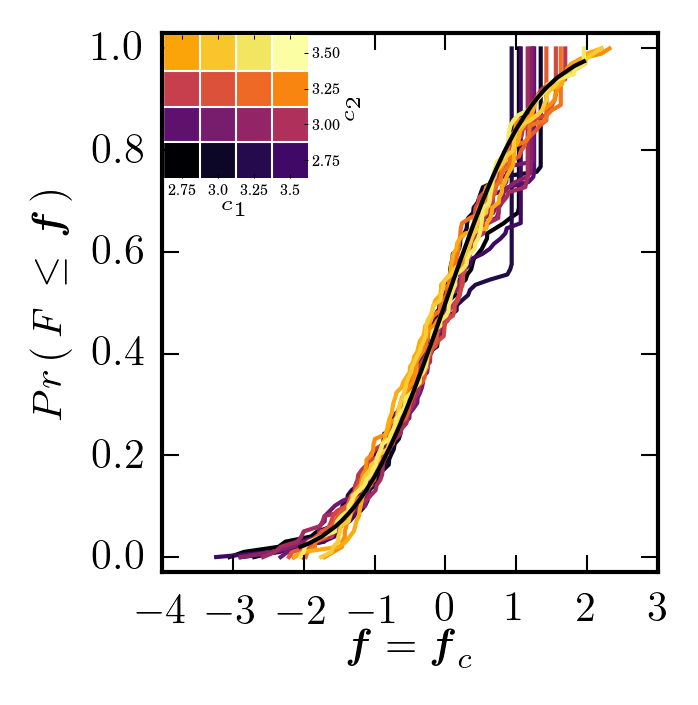

In [28]:
halffig()
ax = plt.gca()

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])     
        plt.plot((data_sorted - np.mean(data_sorted))/np.std(data_sorted), 
                 np.linspace(0,1,data_sorted.size), linewidth = 1,
                 label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100)), \
                 color=cmap(float(1*(i/16))))
    
    
x = (data_sorted - np.mean(data_sorted))/np.std(data_sorted); mu = 0; sigma = 1
y = np.sort((1/(np.sqrt(2*np.pi*(sigma**2))))*(np.exp(-(x-mu)**2/(2*(sigma)**2))))

plt.xlabel(r'$\boldsymbol{f} = \boldsymbol{f}_c$', labelpad = 2)
plt.ylabel(r'$Pr\,(\,\it{F\,\leq\,\boldsymbol{f}}\,)$', labelpad = 5) 
plt.ylim([-0.03, 1.03])

subaxes_inset()


from scipy import stats
gaussian = stats.norm()
z = gaussian.cdf(x)
ax.plot(x,z, color = 'black', linewidth =1, linestyle = '-')

plt.savefig(fig_save_path + "\distribution_divergent_search_collapse.pdf", format='pdf',
            bbox_inches='tight')
plt.show()        


## [3] Residual Plot

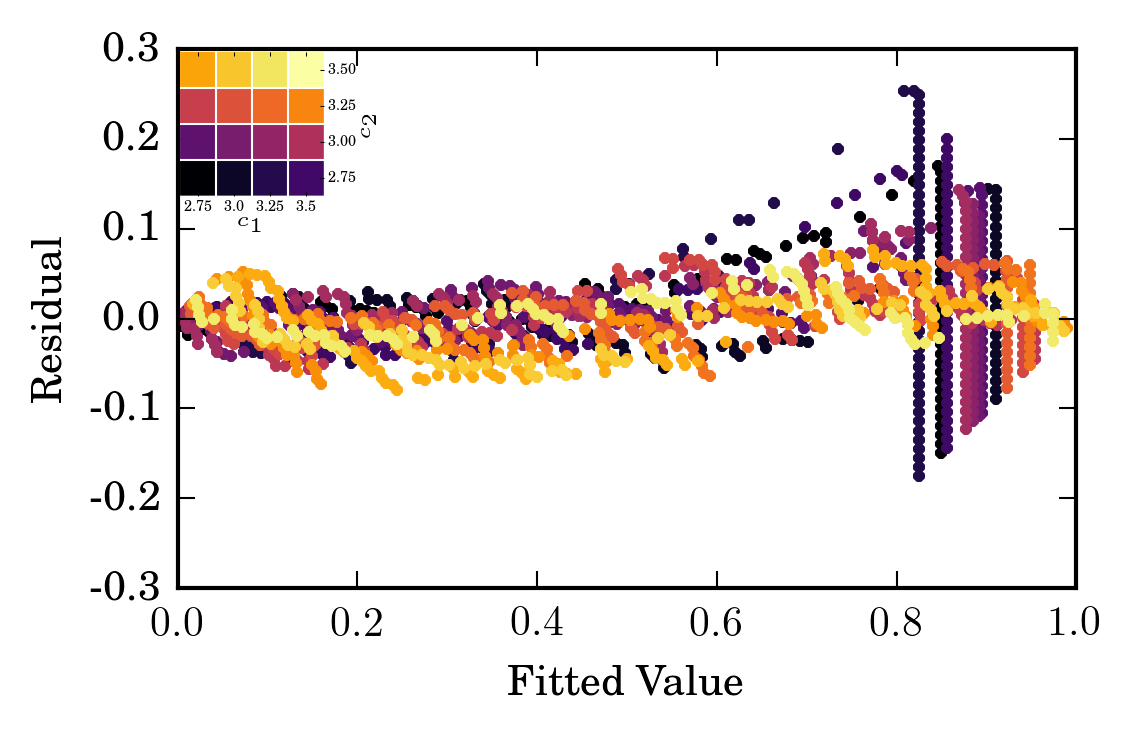

In [29]:
fullfig()
plt.subplot(111, aspect='equal')
ax = plt.gca()

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])
        x = (data_sorted - np.mean(data_sorted))/np.std(data_sorted); mu = 0; sigma = 1
        z = gaussian.cdf(x)
        
        residual = z - np.linspace(0,1,data[:,c2,c1].size)
        plt.plot(z, residual,  'o', markersize = 3,color=cmap(float(1*(i/16))), markeredgecolor = 'none', \
                   label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100))) 
        
plt.ylim([-0.30, 0.30])  
ax.yaxis.set_ticks([-0.30, -0.20, -0.10, 0.0, 0.10, 0.20, 0.30])
ax.set_yticklabels([-0.30, -0.20, -0.10, 0.0, 0.10, 0.20, 0.30])

ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
#plt.grid(True)

subaxes_inset(position = [0.143, 0.736, 3.0*1e-1, 0.20])


plt.savefig(fig_save_path + r"\\divergent_search_residual.pdf", format='pdf',
            bbox_inches='tight')

plt.show()


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


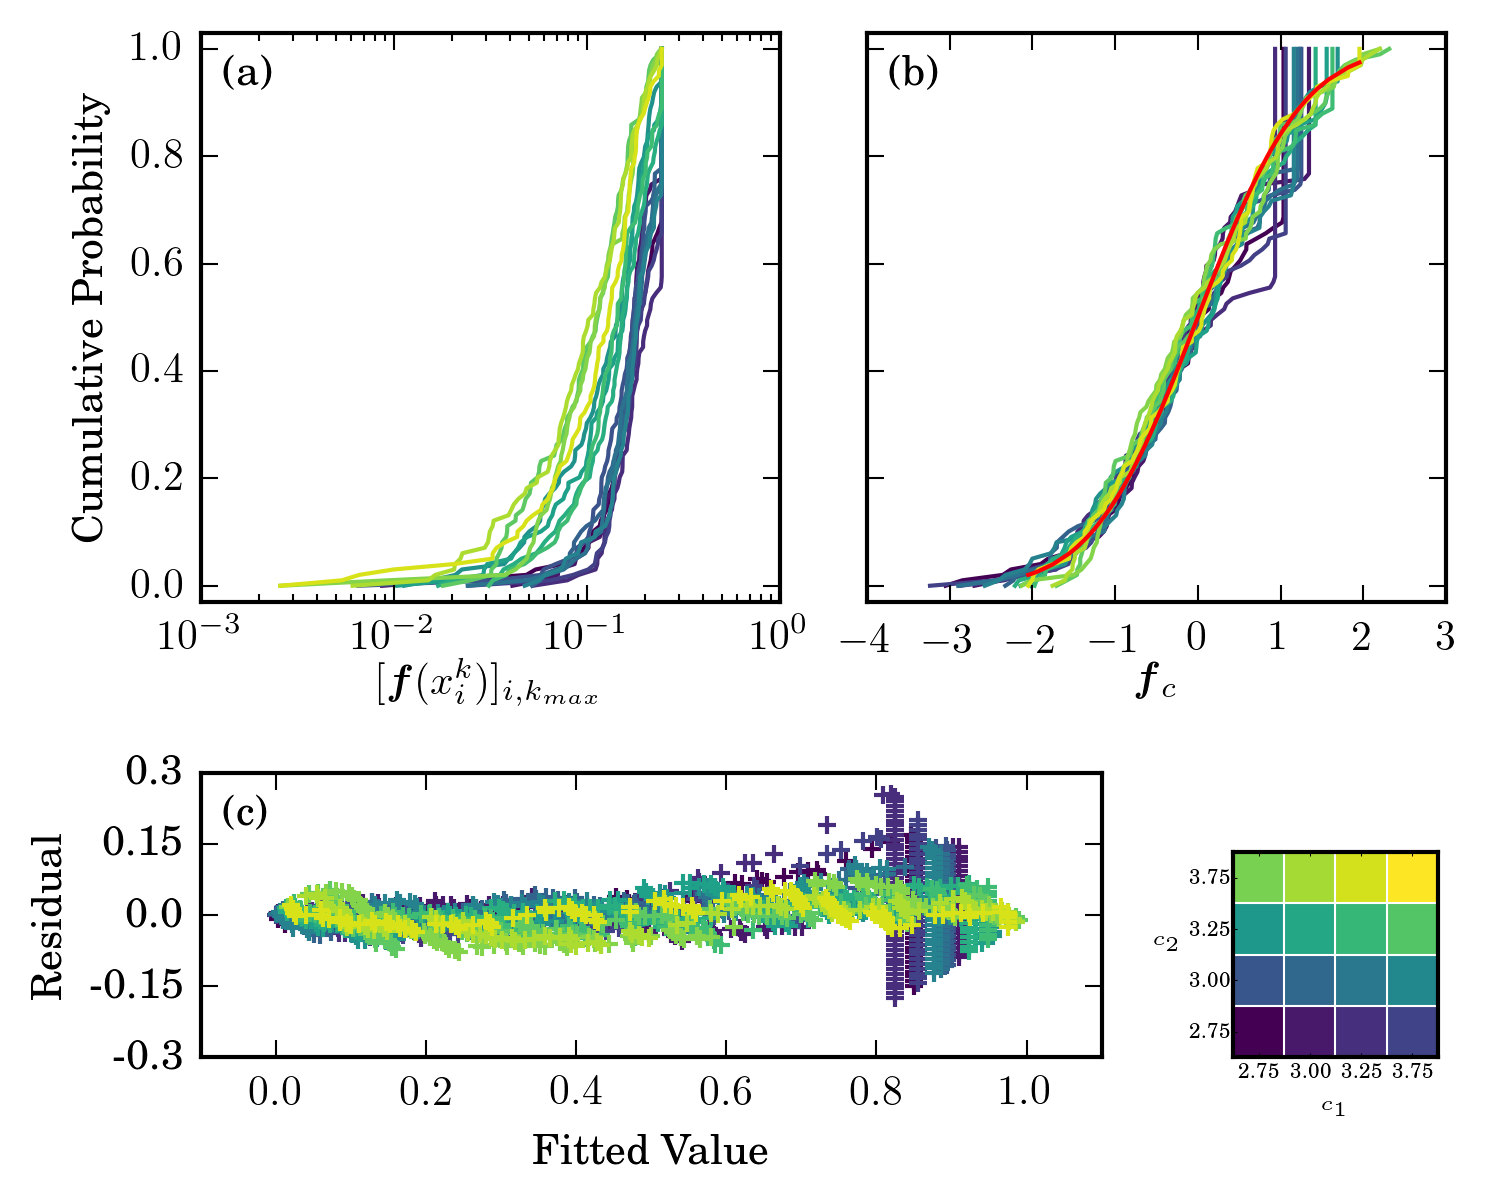

In [11]:
cmap = cmaps.viridis


from matplotlib.gridspec import GridSpec
fullfig(hf = 1.9)
import matplotlib.gridspec as gridspec

plt.subplots_adjust(hspace=0.5, wspace = 0.15)

#plt.subplots_adjust(hspace=0.0)
outer = gridspec.GridSpec(2, 1, height_ratios = [2, 1], hspace=  0.40) 
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[0])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], width_ratios = [3.5, 1])

#ax1 = plt.subplot(gs1[0:1])
#ax2 = plt.subplot(gs2[0:1]); ax3 = plt.subplot(gs2[1:2]); ax4 = plt.subplot(gs2[2:3])
#ax5 = plt.subplot(gs2[3:4]); ax6 = plt.subplot(gs2[4:5]); ax7 = plt.subplot(gs2[5:6])
ax1 = plt.subplot(gs1[0:1]); ax2 = plt.subplot(gs1[1:2])
ax3 = plt.subplot(gs2[0:1]); ax4 = plt.subplot(gs2[1:2])



#----------------
ax = ax1
c1c2pairs = [
                [11,14], [12,14], [13,14], [14,14],
                [11,13], [12,13], [13,13], [14,13],
                [11,12], [12,12], [13,12], [14,12],
                [11,11], [12,11], [13,11], [14,11]
            ]

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])     
        ax1.semilogx(data_sorted , np.linspace(0,1,data_sorted.size), linewidth = 1,\
                    label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100)), \
                    color=cmap(float(1*(i/16))))
        
           
ax1.set_xlabel(r'$[\boldsymbol{f}(x_i^k)]_{i,k_{max}}$', labelpad = 2) 
ax1.set_ylabel(r'Cumulative Probability')
ax1.set_ylim([-0.03, 1.03])

#--------------------------------------------------------------------------------------------------

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])     
        ax2.plot((data_sorted - np.mean(data_sorted))/np.std(data_sorted), 
                 np.linspace(0,1,data_sorted.size), linewidth = 1,
                 label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100)), \
                 color=cmap(float(1*(i/16))))
    
    
x = (data_sorted - np.mean(data_sorted))/np.std(data_sorted); mu = 0; sigma = 1
y = np.sort((1/(np.sqrt(2*np.pi*(sigma**2))))*(np.exp(-(x-mu)**2/(2*(sigma)**2))))

ax2.set_xlabel(r'\boldsymbol{f}_c$', labelpad = 2)
#ax2.set_ylabel(r'$Pr\,(\,\it{F\,\leq\,\boldsymbol{f}}\,)$', labelpad = 5) 
ax2.set_ylim([-0.03, 1.03])
ax2.set_yticklabels([])

from scipy import stats
gaussian = stats.norm()
z = gaussian.cdf(x)
ax2.plot(x,z, color = 'red', linewidth =1, linestyle = '-')

#--------------------------------------------------------------------------------------------------

for i, c1c2 in enumerate(c1c2pairs):
        c1, c2 = c1c2[0], c1c2[1]
        data_sorted = np.sort(data[:,c2,c1])
        x = (data_sorted - np.mean(data_sorted))/np.std(data_sorted); mu = 0; sigma = 1
        z = gaussian.cdf(x)
        
        residual = z - np.linspace(0,1,data[:,c2,c1].size)
        ax3.scatter(z, residual,  marker = '+',color=cmap(float(1*(i/16))), \
                   label = r'$c_1$ = {0}, $c_2$ = {1}'.format("%.2f"%(c1*25/100),"%.2f"%(c2*25/100))) 
        
ax3.set_ylim([-0.30, 0.30])  
ax3.set_xlim([-0.10, 1.1])
ax3.yaxis.set_ticks([-0.30, -0.15, 0.0, 0.15, 0.30])
ax3.set_yticklabels([-0.30, -0.15, 0.0, 0.15, 0.30])
ax3.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax3.set_xlabel('Fitted Value')
ax3.set_ylabel('Residual')

#--------------------------------------------------------------------------------------------------

subaxes = ax4
subaxes.imshow(grid, cmap = cmap, interpolation='None')

subaxes.xaxis.set_ticks([0,1,2,3]) 
subaxes.yaxis.set_ticks([0,1,2,3]) 
subaxes.xaxis.set_tick_params(size = 1, width = 0.25,  pad=1)
subaxes.yaxis.set_tick_params(size = 1, width = 0.25, pad = 1)

subaxes.yaxis.set_label_position("left")
subaxes.yaxis.tick_left()

subaxes.set_xticklabels(['2.75', '3.00', '3.25', '3.75'], size = 5)
subaxes.set_yticklabels(['2.75', '3.00', '3.25', '3.75'][::-1], size = 5)

subaxes.set_xlabel(r'$c_1$', fontsize = 5, labelpad = 5)
subaxes.set_ylabel(r'$c_2$', fontsize = 5, labelpad = 5, rotation = 0)

subaxes.axvline(0.5, 0, 3, linewidth = 0.50, color = 'white')
subaxes.axhline(0.5, 0, 3, linewidth = 0.50, color = 'white')
subaxes.axvline(1.5, 0, 3, linewidth = 0.50, color = 'white')
subaxes.axhline(1.5, 0, 3, linewidth = 0.50, color = 'white')
subaxes.axvline(2.5, 0, 3, linewidth = 0.50, color = 'white')
subaxes.axhline(2.5, 0, 3, linewidth = 0.50, color = 'white')

subaxes.yaxis.tick_left()
ax4.set_position([0.82,0.19,0.15,0.15])

#-------------------------------------------------------------------------------------------------
subplotlabel('(a)', 'upper left', ax=ax1, size = 10)
subplotlabel('(b)', 'upper left', ax=ax2, size = 10)
subplotlabel('(c)', 'upper left', ax=ax3, size = 10)


plt.savefig(fig_save_path + r"\\divergent_search.pdf", format='pdf',
            bbox_inches='tight')
